In [180]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import seaborn as sns


In [181]:
import warnings
warnings.filterwarnings('ignore')

In [174]:
def test_pred(true_values, pred_values):
    print('R2: ' + str(r2(true_values, pred_values)))
    
    plt.figure(figsize=(10,10))
    plt.scatter(pred_values, true_values)
                    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [123]:
boston = load_boston()

In [124]:
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [125]:
X = pd.DataFrame(boston.data,columns=boston.feature_names)

In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [127]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [128]:
y = pd.DataFrame(boston.target, columns=['price'])

In [143]:
y

price
0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
..     ...
501   22.4
502   20.6
503   23.9
504   22.0
505   11.9

[506 rows x 1 columns]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

R2: 0.7434997532004697


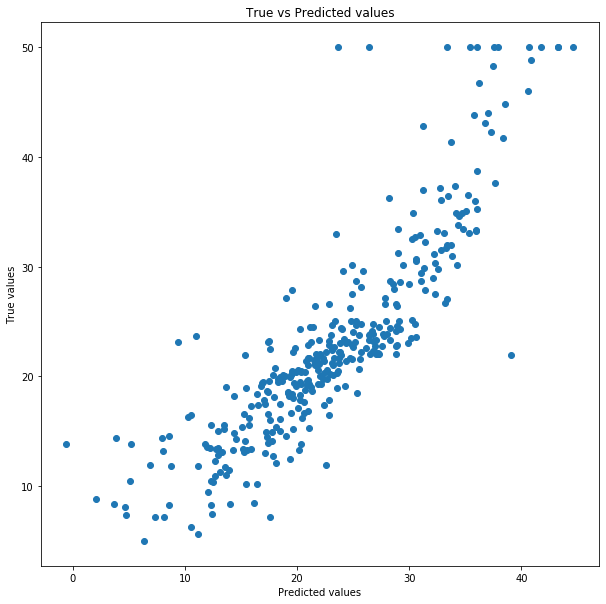

In [175]:
y_train_pred = lr.predict(X_train)
test_pred(y_train, y_train_pred)

R2: 0.711226005748496


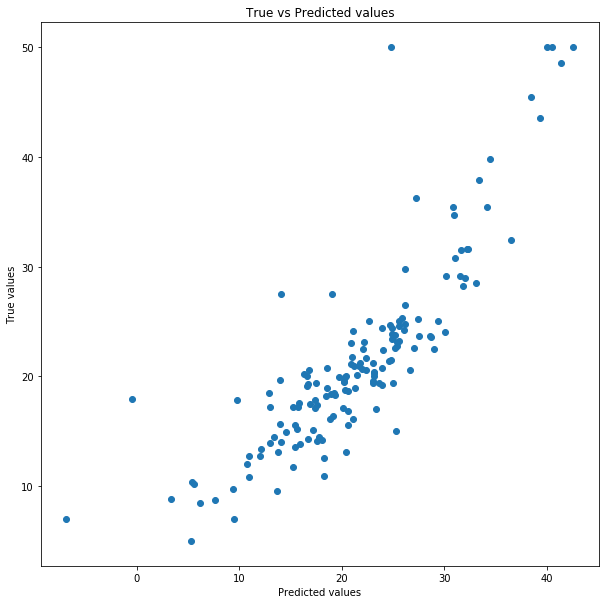

In [177]:
y_test_pred = lr.predict(X_test)
test_pred(y_test, y_test_pred)

In [182]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [183]:
y_trein_pred_2 = model.predict(X_train)

R2: 0.9783932499959492


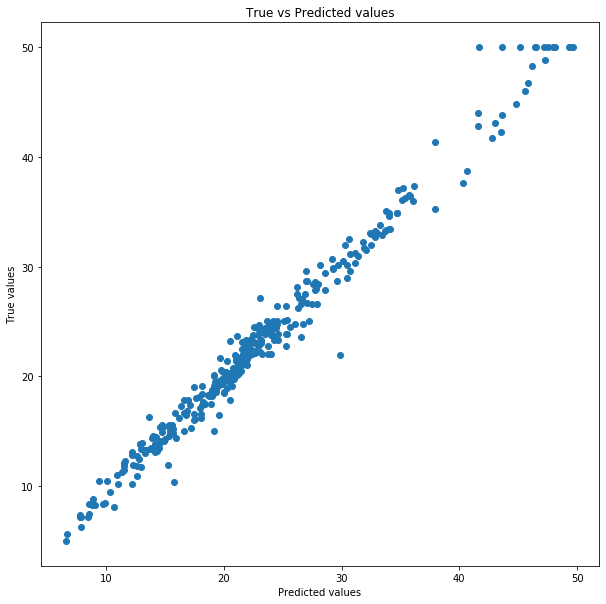

In [184]:
test_pred(y_train, y_trein_pred_2)

In [185]:
y_test_pred_2 = model.predict(X_test)

R2: 0.8749965273218174


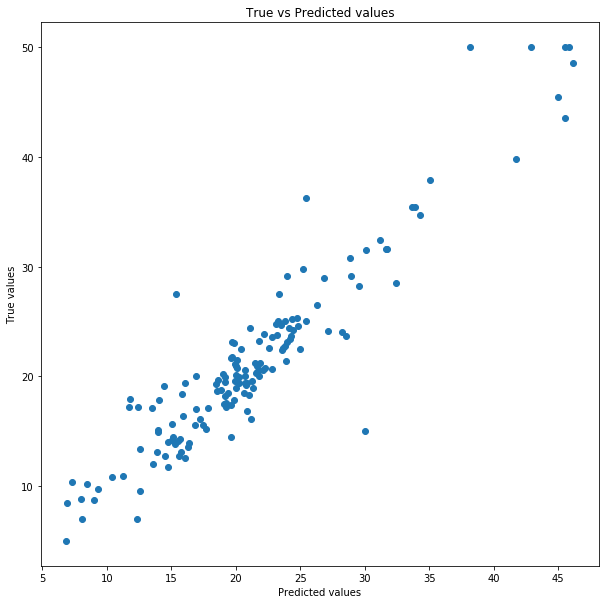

In [186]:
test_pred(y_test, y_test_pred_2)